In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# 1. Load Synthetic Dataset
df = pd.read_csv("../data/synthetic_adult_clean.csv")

# 2. Encoding variabili categoriche
df_encoded = df.copy()
label_encoders = {}

for col in ["education", "occupation", "income"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Feature e target
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]

# 4. Train/test split con stratificazione
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Modello XGBoost con tuning leggero
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=2,  # penalizza la classe minoritaria
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# 6. Valutazione
y_pred = xgb_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(
    y_test, y_pred, target_names=label_encoders["income"].classes_
))

Classification Report:

              precision    recall  f1-score   support

       <=50K       0.88      0.84      0.86       136
        >50K       0.62      0.69      0.65        52

    accuracy                           0.80       188
   macro avg       0.75      0.77      0.76       188
weighted avg       0.81      0.80      0.80       188



/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:04:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:08:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


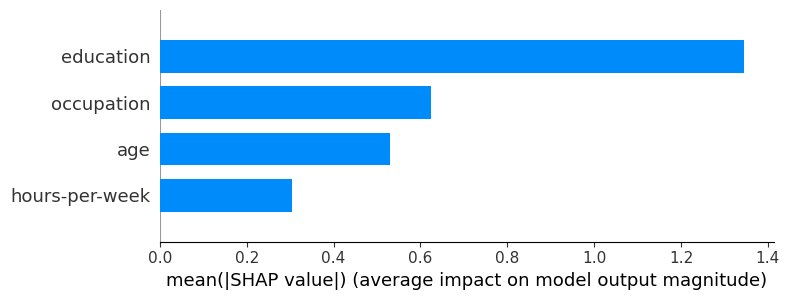

In [8]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Carica il dataset sintetico
df = pd.read_csv("../data/synthetic_adult_clean.csv")

# Encoding variabili categoriche
df_encoded = df.copy()
label_encoders = {}
for col in ["education", "occupation", "income"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature e target
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Modello XGBoost
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=1.5,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# SHAP solo per XGBoost (TreeExplainer)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot (bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [9]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Caricamento dataset e encoding
df = pd.read_csv("../data/synthetic_adult_clean.csv")
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
label_encoders = {}
for col in ["education", "occupation", "income"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]

# Addestramento modello
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
model.fit(X, y)

# SHAP: TreeExplainer per modelli ad albero (nessun uso di Torch o CUDA)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot
plt.figure()
shap.summary_plot(shap_values, X, show=False)
plt.tight_layout()
plt.savefig("../outputs/shap_summary_plot.png")
plt.close()

/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
